# Creating an OLS Function in Python

## Linear Algebra in *numpy*

We reviewed Chapter 7 to understand how to genereate an inverse matrix. 

To transform matrix $X$ into $X^{-1}$. To do so we must transform $[XI]$ into $[IX^{-1}]$. This is accomplished in chap 7 of the textbook. We are going to check the result using numpy.

In [1]:
#invert Matrix.py
import numpy as np
#create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join x1, x2, and x3 using _np.concatenate()_. We define _axis = 0_ so that the rows are stacked vertically, not horizontally.

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


Next, use _np.round()_ to clearly present variables that include digits to the nth place (17).

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


Finally, we should also see how to generate the tranpose of a matrix. The transpose switches the index values $i$ and $j$. In otherwords, switch the row indexes with the column indexes.

In [6]:
print("X:", X, sep = "\n")
X_transpose = X.getT()
print("X Transpose:", X_transpose, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]
X Transpose:
[[1 4 6]
 [2 1 8]
 [1 5 6]]


## Diversion on Classes in Python

In [7]:
class Arithmetic:
    def __init__(self):
        self.name = "arithmetic"
        self.val = 10

    def add(self, *args):
        total = 0
        try:
            for arg in args:
                total += arg
                
            return total
        except:
            ("pass list or tuple of ints or floats to add()")

    def multiply(self, *args):
        product = 1
        try:
            for arg in args: 
                product *= arg
            return product
        except:
            print("pass only int or float to multiply")

In [8]:
arithmetic = Arithmetic()
print(arithmetic)
print(arithmetic.add(1,2,3,4))
print(arithmetic.multiply(1,2,3,4))
print(arithmetic.name)
print(arithmetic.val)

#print(arithmetic.class_name)

10
24
arithmetic
10


## Building an OLS Regression Function

$\beta = (X'X)^{-1}X'Y$

An OLS regression posits a relationship between a dependent variable, $Y$, and independent variables - each $x_i$ - contain in $X$.

In [9]:
# Econfreedomregression.py

import pandas as pd
data = pd.read_csv("cleanedEconFreedomData.csv",
                  index_col = "Country Name")
data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,41.032,30.9,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,28.665,91.6,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,25.570,15.5,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9


Next we will create the regression.py file. I did it in Spyder but I had to paste it in here to use in the code. I can't seem to get it to pull in from the py file even though it's in the same directory. This file will create the beginnings of our OLS function to run a regression on our variables.

In [20]:
#regression.py

import pandas as pd
from stats import *
import numpy as np
from scipy.stats import t, f

class Regression:
    def __init__(self):
        self.stats = stats()
        self.reg_history = {}
        
    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,
                max_val = None, constant = True):
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        self.beta_names = beta_names
        self.data = data.copy()
        if constant:
            self.add_constant()
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
        
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
        
    def build_matrices(self):
        #transform dataframes to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        #create a k X n nested list containg vectors for each exog var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        #(X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        #X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)
    
    def estimate_betas_and_yhat(self):
        #betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        #y_hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        #create a column that holds y_hat values
        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
        #create a table that holds the estimated coefficient
        #as well as the standard errors, tstats,and pvalues
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        #id y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]
        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        self.calculate_degrees_of_freedom()
        self.calculate_estimator_variance()
        self.calculate_covariance_matrix()
        self.calculate_t_p_error_stats()
        self.calculate_root_MSE()
        self.calculate_rsquared()
        self.calculate_fstat()
        self.build_stats_DF()
    
    def sum_square_stats(self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item(0)
        for i in range(len(self.y)):
            #ssr is sum of squared distances between the estimated y values
            #(y_hat) and the average of y values (y_bar or simply mean_y)
            yhat_i = self.y_hat[i]
            y_i = self.y[i]
            ssr_list.append((yhat_i - mean_y) ** 2)
            sse_list.append((y_i - yhat_i) ** 2)
            sst_list.append((y_i - mean_y) ** 2)
            #calling the item calls the value instead of matrix
            self.ssr = self.stats.total(ssr_list).item(0)
            self.sst = self.stats.total(sst_list).item(0)
            self.sse = self.stats.total(sse_list).item(0)

    def calculate_degrees_of_freedom(self):
        #df compares the num of observs to the num
        #exog variables used to form the prediction
        self.lost_degrees_of_freedom = len(self.estimates)
        self.num_obs = self.max_val + 1 - self.min_val
        self.degrees_of_freedom =  self.num_obs - self.lost_degrees_of_freedom
        
    def calculate_estimator_variance(self):
        #estimator variance is the sse normalized by the degrees of freedom
        #so it increases as the number of exog vars used in estimating increase
        #that is, as degrees of freedom fall
        self.estimator_variance = self.sse / self.degrees_of_freedom
        
    def calculate_covariance_matrix(self):
        #cov matrix will be used to estimate standard errors for ea coeff
        #estimator var * (X'X)**-1 is the cov matrix
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv
        self.cov_matrix = pd.DataFrame(self.cov_matrix, 
                                       columns = self.beta_names,
                                       index = self.beta_names)
    
    def calculate_t_p_error_stats(self):
        self.rating_dict = {.05:"*",
                       .01:"**",
                       .001: "***"}
        results = self.estimates
        stat_sig_names = ["SE", "t-stat", "p-value"]
        for stat_name in stat_sig_names: 
            results[stat_name] = np.nan
        #generate statistic for each variable
        for var in self.beta_names:
            #SE of coefficient is found in the diagonal of cov_matrix
            results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)
            #tstat = Coeff / SE
            results.loc[var]["t-stat"] = \
                results["Coefficient"][var] / results["SE"][var]
            #p-value is estimated using a  table that transforms t-value in refference to df
            results.loc[var]["p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var]["t-stat"]),self.degrees_of_freedom + 1) * 2, 5)
        #values for signifiances will be blank unless p-value < .05
        #pandas does not allow np.nan values or default blank strings to be replaced
        significance = ["" for i in range(len(self.beta_names))]   
        for i in range(len(self.beta_names)):
            var = self.beta_names[i]
            for val in self.rating_dict:
                if results.loc[var]["p-value"] < val:
                    significance[i] = self.rating_dict[val]
                    print(var, self.rating_dict[val])  
        results["significance"] = significance
        
    def calculate_root_MSE(self):
        self.root_mse = self.estimator_variance ** (1/2)
    
    def calculate_rsquared(self):
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
                             / (self.num_obs - 1))
    
    def calculate_fstat(self):
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                       - 1) / self.estimator_variance
    
    def build_stats_DF(self):
        stats_dict = {"r**2": [self.r_sq],
                      "Adj. r**2": [self.adj_r_sq],
                      "f-stat": [self.f_stat],
                      "EST Var": [self.estimator_variance],
                      "MSE": [self.root_mse],
                      "SSE": [self.sse],
                      "SSR": [self.ssr],
                      "SST": [self.sst],
                      "Obs.": [self.num_obs],
                      "DOF":[self.degrees_of_freedom]}
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T

    def save_output(self):
        self.reg_history[self.reg_name] = {}
        self.reg_history[self.reg_name]["Reg Stats"] = self.stats_DF.copy()
        self.reg_history[self.reg_name]["Estimates"]= self.estimates.copy()
        self.reg_history[self.reg_name]["Cov Matrix"] = self.cov_matrix.copy()

The above is my regression.py file without any of the f-stat function because we did not build it in class even though I had typed it following the notes before.

In [21]:
#from regression import Regresssion
reg = Regression()
print(reg)

You created an instance of stats()


In [22]:
y_var = ["GDP per Capita (PPP)"]
x_vars = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]

reg.OLS("GDP per Capita", data, y_var, x_vars)

Property Rights *
Property Rights **
Property Rights ***
Public Debt (% of GDP) *
Constant *


In [23]:
reg.betas

matrix([[    60.47038974],
        [   805.63685839],
        [   215.42709103],
        [   -89.6204527 ],
        [-24027.12022385]])

The dataframe below shows significance even though it was created before the way to show significance was added. Once the kernel was re-ran, significance was displayed here too.

In [32]:
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


Next, we use the sum squared statistics (ssr, see, and sst to calculate different variables that reflect the goodess of fit)

In [25]:
reg.ssr, reg.sse, reg.sst

(40627979241.38482, 39504107666.815506, 80132086908.20023)

In [27]:
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


Next, in class we included a way to mark significance. Since my code is built above, the previous dataframe showed significance too. We also already created the code for generating standard erros, tstats, and p-values. We can pass it to a csv as well.

In [33]:
reg.estimates.to_csv("regResults.csv")
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


Next, we will add root MSE, R2, and the F-test to our regression file. The equations for these calculations are below:

$rootMSE = \sqrt{\sigma^2}$ 

$R^2 = \frac{SSR}{SST}$

$ F =\frac{\frac{SST - SSE}{K - 1}}{\frac{SSE}{N - K}}$

This last equation is the f-statistic which we did not get to in class.

$\beta_1 = \beta_2 = . . . = \beta_{n-1} = \beta_n$


We will display all of the stats we calculated as a dataframe.

In [34]:
reg.stats_DF.to_csv("regStatistics.csv")
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
Adj. r**2,4.952748e-01
f-stat,4.319488e+01
EST Var,2.351435e+08
MSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


Finally, we can create scatterplots that display and therefore compare the observations and the estimates found through OLS. 

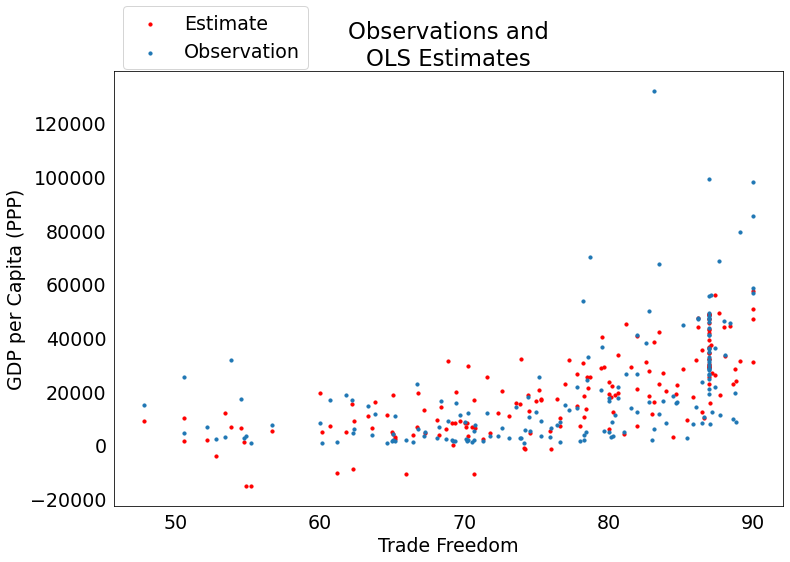

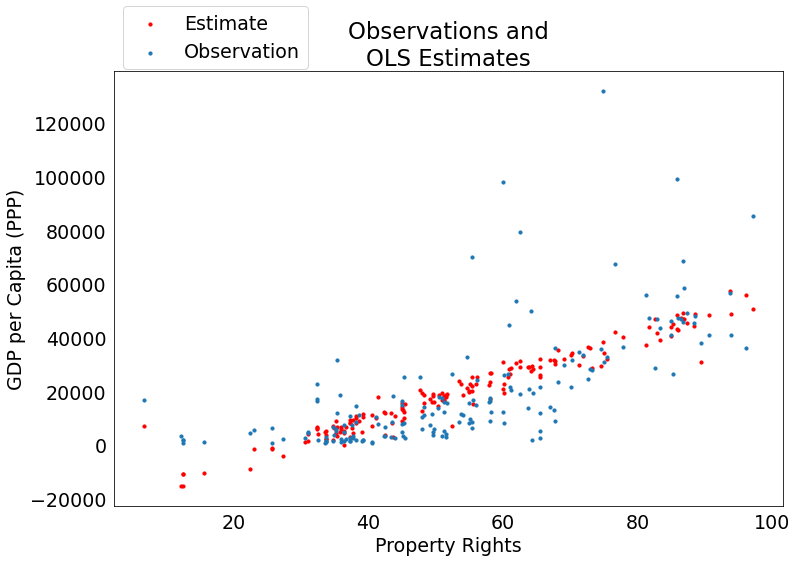

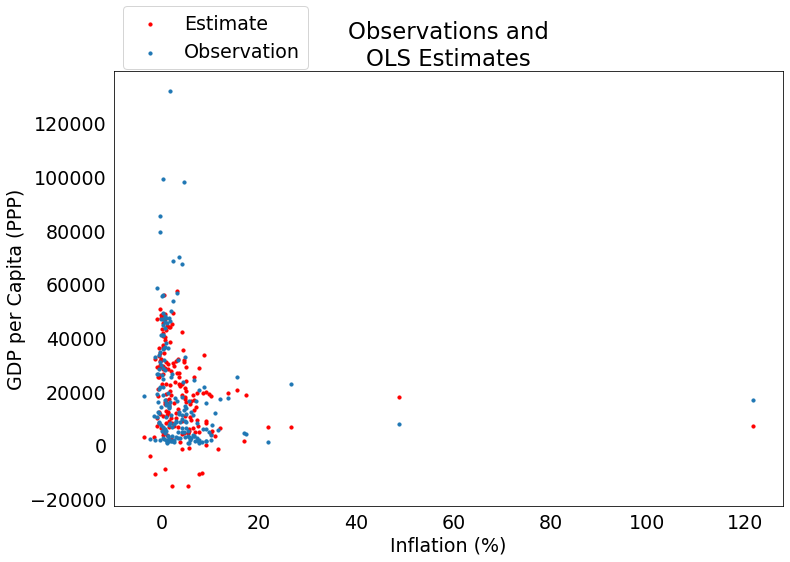

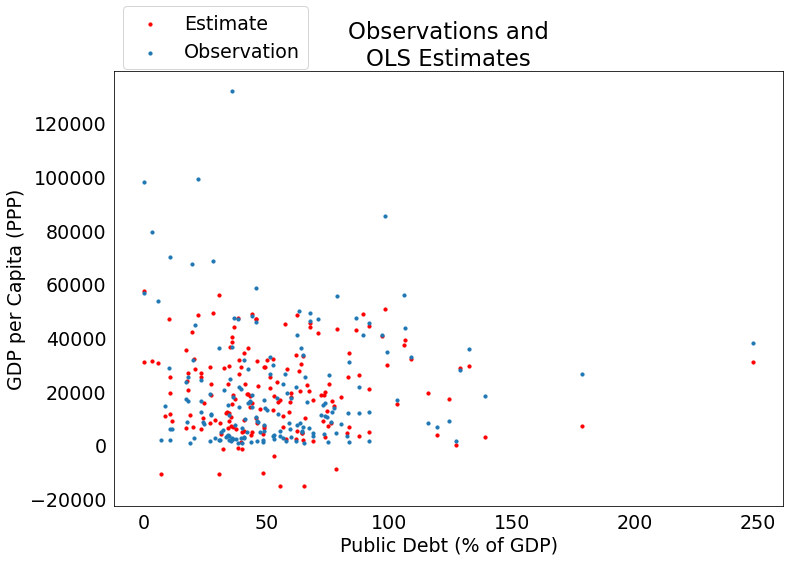

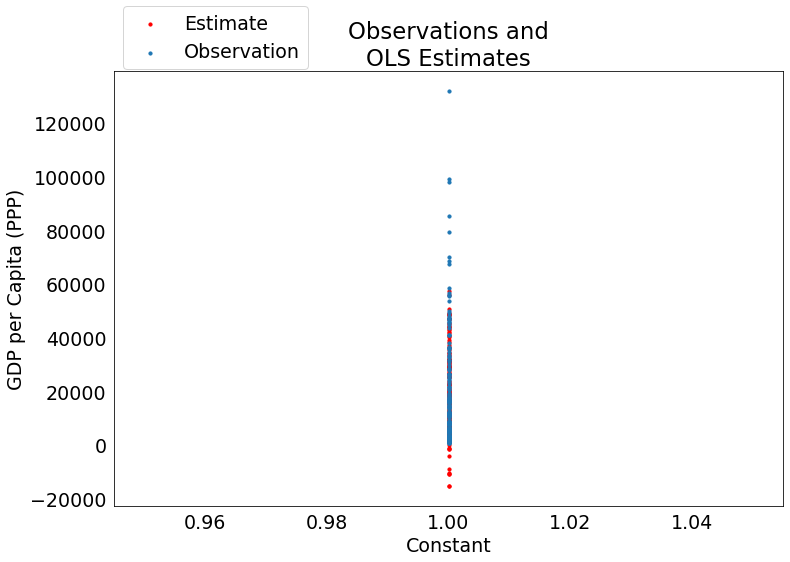

In [35]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    #set default font size
    plt.rcParams.update({"font.size":19})
    #use a for loop to call each exogenous variable
    y = y_var[0]
    for x in x_vars:  
        #prepare a figure with the predictor
        #ax signifies they are in the same plot
        fig, ax = plt.subplots(figsize=(12,8))  
        #put the labels in the legend  
        y_label1 = "Estimate"  
        y_label2 = "Observation"  
        #plot the estimated value 
        data.plot.scatter(x = x, y = y + " estimator", ax = ax, c = "r", 
                          s = 10, label = y_label1, legend = False)  
        #erase the y_axis label so that "estimator" is not shown 
        plt.ylabel("")  
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, label = y_label2,  
                          legend = False)  
        #put the legend to the top left
        #bbox_to_anchor will specify the exact placement
        plt.legend(loc = "upper left", labels = [y_label1, y_label2],   
                   bbox_to_anchor = (0, 1.17))  
        plt.title("Observations and\nOLS Estimates")
        #remove tick lines
        ax.xaxis.set_ticks_position('none')  
        ax.yaxis.set_ticks_position('none')   
        if pp != None: pp.savefig(fig, bbox_inches = "tight")
        
pp = PdfPages("RegressionPlots.pdf")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var)

pp.close()